In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2
from RTKToArrayConversion import *
from ExtendedConeBeamDCC import *
from TextFileSaving import * 
from ConeBeamDCCWithBackprojectionPlane import *
from AllAcquisitionCD_Beta_Class import *
%matplotlib notebook
plt.rcParams.update({'font.size': 14})

In [3]:
I0_var_a = []
I0_th_a = []
m_tot_a = []
mean_proj_a = []

I0_var_b = []
I0_th_b = []
m_tot_b = []
mean_proj_b = []

I0_var_c = []
I0_th_c = []
m_tot_c = []
mean_proj_c = []

I0_var_d = []
I0_th_d = []
m_tot_d = []
mean_proj_d = []

In [27]:
filesdir_ref = "/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/phantom/14_01_22/4D/sans_table/donneesBrutes/P007_Trot035_Tresp4/"
# reading projections
proj = itk.imread(filesdir_ref+"proj_6.mhd")
# Reading the geometry of the scanner
xmlreader = rtk.ThreeDCircularProjectionGeometryXMLFileReader.New()
xmlreader.SetFilename(filesdir_ref+'geometry_6.xml')
# xmlreader.SetFilename(filesdir_ref+"geometry.xml")
xmlreader.GenerateOutputInformation()
geometry = xmlreader.GetOutputObject()
print('nproj = %d'%(len(geometry.GetGantryAngles())))
print(proj.GetLargestPossibleRegion().GetSize())

nproj = 27745
itkSize3 ([920, 32, 27745])


In [28]:
#Convert to array for faster computation
geometry_array = RTKtoNP(geometry)
proj_array = itk.GetArrayFromImage(proj)
proj_infos = GetProjectionInformations(proj)
source_pos_array = GetSourcePositions(geometry)
rotation_matrices_array = GetRotationMatrices(geometry)
fixed_matrices_array = GetFixedSystemMatrices(geometry)
print(proj_infos)
AcquiDCC = DCCOnCDinAnAcquisition(geometry_array, source_pos_array, rotation_matrices_array, fixed_matrices_array, proj_array, proj_infos)

[array([1.02806101, 1.0947541 , 1.        ]), array([0., 0., 0.]), array([  920,    32, 27745]), array([[ 1.,  0.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  0.,  1.]])]


24


<IPython.core.display.Javascript object>


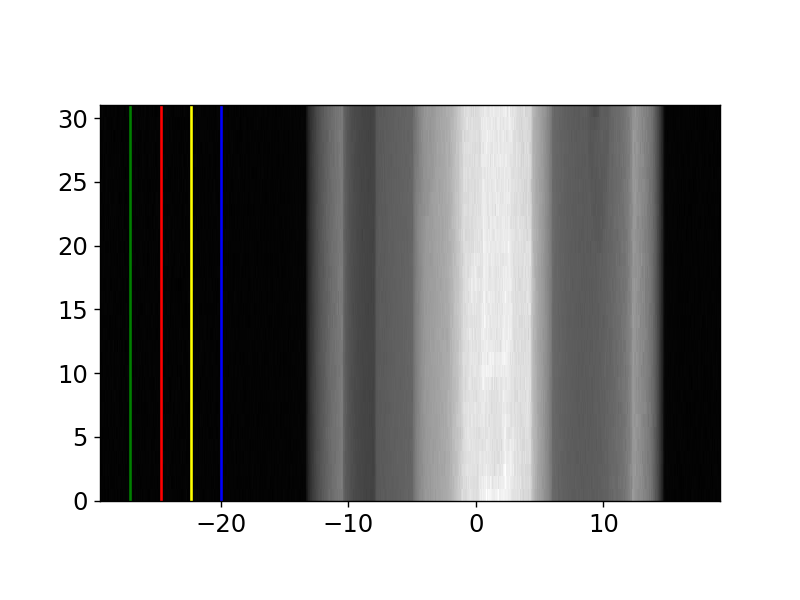

In [29]:
proj_id = np.array(np.where(np.abs(geometry_array[2,:])<np.abs(geometry_array[2,  1]-geometry_array[2,  0]))[0])
print(len(proj_id))

plt.figure()
plt.imshow(proj_array[proj_id[0], :, :], cmap="gray", extent=(AcquiDCC.gamma[0]*180/np.pi, AcquiDCC.gamma[-1]*180/np.pi, 0, 31))
plt.axvline(AcquiDCC.gamma[45]*180/np.pi, color = 'green')
plt.axvline(AcquiDCC.gamma[90]*180/np.pi, color='red')
plt.axvline(AcquiDCC.gamma[135]*180/np.pi, color = 'yellow')
plt.axvline(AcquiDCC.gamma[180]*180/np.pi, color="blue")
plt.show()

In [30]:
bt_120 = np.genfromtxt('/home/mmouchet/Documents/SIEMENSDATA/GO.SIM/doc/bowtie/BowTieProfilesFiles/Wedge_120_w1.txt', skip_header=1, unpack=True).T
bt_factor = np.interp(np.array([AcquiDCC.gamma[45],AcquiDCC.gamma[90],AcquiDCC.gamma[135], AcquiDCC.gamma[180]]), bt_120[:, 0]*np.pi/180, bt_120[:, 1])
supp_current = np.genfromtxt(filesdir_ref + "tube_current_Tresp4.txt", skip_header=0, unpack=True, delimiter= ',').T
supp_int = np.array([bt_factor]*len(proj_id)).T*(0.001*supp_current[5*27744+proj_id]*120000**2)

proj_set = np.array([proj_array[proj_id, :, 45],proj_array[proj_id, :, 90], proj_array[proj_id, :, 135], proj_array[proj_id, :, 180]])
m_set = (2294.5**2/np.var(proj_set, axis = 2))/supp_int

I0_var_a.append(2294.5**2/np.var(proj_set, axis=2)[0,:])
I0_th_a.append(supp_int[0,:])
m_tot_a.append(m_set[0,:])
mean_proj_a.append(np.mean(proj_set, axis=2)[0,:])
I0_var_b.append(2294.5**2/np.var(proj_set, axis = 2)[1,:])
I0_th_b.append(supp_int[1,:])
m_tot_b.append(m_set[1,:])
mean_proj_b.append(np.mean(proj_set, axis=2)[1,:])
I0_var_c.append(2294.5**2/np.var(proj_set, axis = 2)[2,:])
I0_th_c.append(supp_int[2,:])
m_tot_c.append(m_set[2,:])
mean_proj_c.append(np.mean(proj_set, axis=2)[2,:])
I0_var_d.append(2294.5**2/np.var(proj_set, axis = 2)[3,:])
I0_th_d.append(supp_int[3,:])
m_tot_d.append(m_set[3,:])
mean_proj_d.append(np.mean(proj_set, axis=2)[3,:])

In [31]:
save_dir = "/home/mmouchet/Documents/Report/thesis/simu/chapter05/coeff_m/"
acqui_id = "acqui2_"
np.savetxt(save_dir+acqui_id+'m_tot_channel45.txt', np.concatenate(m_tot_a), delimiter=',')
np.savetxt(save_dir+acqui_id+'I0_var_channel45.txt', np.concatenate(I0_var_a), delimiter=',')
np.savetxt(save_dir+acqui_id+'I0_th_channel45.txt', np.concatenate(I0_th_a), delimiter=',')
np.savetxt(save_dir+acqui_id+'mean_proj_channel45.txt', np.concatenate(mean_proj_a), delimiter=',')

np.savetxt(save_dir+acqui_id+'m_tot_channel90.txt', np.concatenate(m_tot_b), delimiter=',')
np.savetxt(save_dir+acqui_id+'I0_var_channel90.txt', np.concatenate(I0_var_b), delimiter=',')
np.savetxt(save_dir+acqui_id+'I0_th_channel90.txt', np.concatenate(I0_th_b), delimiter=',')
np.savetxt(save_dir+acqui_id+'mean_proj_channel90.txt', np.concatenate(mean_proj_b), delimiter=',')

np.savetxt(save_dir+acqui_id+'m_tot_channel135.txt', np.concatenate(m_tot_c), delimiter=',')
np.savetxt(save_dir+acqui_id+'I0_var_channel135.txt', np.concatenate(I0_var_c), delimiter=',')
np.savetxt(save_dir+acqui_id+'I0_th_channel135.txt', np.concatenate(I0_th_c), delimiter=',')
np.savetxt(save_dir+acqui_id+'mean_proj_channel135.txt', np.concatenate(mean_proj_c), delimiter=',')

np.savetxt(save_dir+acqui_id+'m_tot_channel180.txt', np.concatenate(m_tot_d), delimiter=',')
np.savetxt(save_dir+acqui_id+'I0_var_channel180.txt', np.concatenate(I0_var_d), delimiter=',')
np.savetxt(save_dir+acqui_id+'I0_th_channel180.txt', np.concatenate(I0_th_d), delimiter=',')
np.savetxt(save_dir+acqui_id+'mean_proj_channel180.txt', np.concatenate(mean_proj_d), delimiter=',')